Trabajar en espacios de alta dimensionalidad puede ser... _molesto_. Por esto, se suele buscar reducir la dimensionalidad para:

* Visualizar los datos
* Reducir el espacio necesario para almacenar los datos (compresión)
* Reducir el costo computacional al entrenar algoritmos al reducir el número de features.
* Mejorar el funcionamiento de los modelos al incrementar el cociente señal/ruido y la densidad de puntos ( evitando la... *maldición de la dimensionalidad*).

Existen varios enfoques para reducir la dimensionalidad reteniendo la mayor cantidad de información posible. En particular, hay dos enfoques muy populares:
* Proyección: Proyectar el espacio altamente dimensional en un hiperplano de menor dimensionalidad, colapsando todas las variables ortogonales a él.
* Manifold-Learning: Aprender la geometría de un manifold de menor dimensión y proyectar la data a ese manifold.

Para la primer categoría, uno de los algoritmos más populares es el Análisis de Componentes Principales, o en _Principal Component Analysis_ (PCA).

In [1]:
# importamos las librerias necesarias
import sys
assert sys.version_info >= (3, 5)
import os
import pandas as pd
import numpy as np
np.random.seed(42)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=16)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)


In [26]:
import numpy as np 
# Estandarizador (transforma las variables en z-scores)
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler() # Creamos el estandarizador para usarlo posteriormente
from sklearn.decomposition import PCA

In [2]:
DATA_PATH = "../data"
def load_data_prep(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "train_set_limpio.csv")
    return pd.read_csv(csv_path)

def load_data_test(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "test_set.csv")
    return pd.read_csv(csv_path)

In [3]:
train_set = load_data_prep()
test_set = load_data_test()

In [4]:
X = train_set.drop(['cod', 'label'], axis=1).values
y = train_set['label']

In [22]:
print('Dimensiones de la matriz de features: {}'.format(X.shape))

Dimensiones de la matriz de features: (52, 290)


In [24]:
# Ajustamos el estandarizador
std_scale.fit(X)

# Aplicamos el estandarizador y obtenemos la matriz de features escaleados
X_scaled = std_scale.transform(X)

In [27]:
print(np.cov(X_scaled.T))

[[1.01960784 0.04991598 0.09732907 ... 0.04012891 0.10285863 0.08150788]
 [0.04991598 1.01960784 0.33692116 ... 0.39900902 0.47426389 0.48875895]
 [0.09732907 0.33692116 1.01960784 ... 0.31580858 0.36444216 0.32887519]
 ...
 [0.04012891 0.39900902 0.31580858 ... 1.01960784 0.68478949 0.94844007]
 [0.10285863 0.47426389 0.36444216 ... 0.68478949 1.01960784 0.8678029 ]
 [0.08150788 0.48875895 0.32887519 ... 0.94844007 0.8678029  1.01960784]]


In [28]:
pca = PCA()
# Ajustamos el modelo a los datos escaleados
pca.fit(X_scaled)

# Obtenemos la descripción de los datos en el espacio de componentes principales
X_pca = pca.transform(X_scaled)

print('Dimensiones de la matriz en componentes principales: {}'.format(X_pca.shape))
print(X_pca)

Dimensiones de la matriz en componentes principales: (52, 52)
[[-6.52706490e+00  6.44301461e+00 -4.53062432e+00 ...  1.69705888e-02
  -2.72891391e-02 -3.02535774e-15]
 [ 8.64750953e+00 -8.63482294e+00  3.15626821e+00 ... -1.33236216e-02
  -1.64586818e-03 -3.22658567e-15]
 [ 3.29326835e+00 -1.14968425e+01  5.85465437e+00 ... -6.33612475e-02
  -3.53380211e-02  6.91113833e-15]
 ...
 [ 4.07792420e+00  5.89793415e+00 -4.95959751e+00 ...  1.81767197e-02
   2.76025508e-03 -2.94209102e-15]
 [ 1.16099281e+00 -2.68406247e+00  1.61567465e+00 ... -2.13673502e-02
  -1.27817685e-02  1.37390099e-15]
 [-1.98545488e+00  8.16964224e+00 -1.19632982e-01 ... -1.55526447e-02
  -6.19965929e-02 -1.66533454e-16]]


In [29]:
print(X_scaled.shape, X_pca.shape)

(52, 290) (52, 52)


Text(0.5, 0, 'Cantidad de componentes principales')

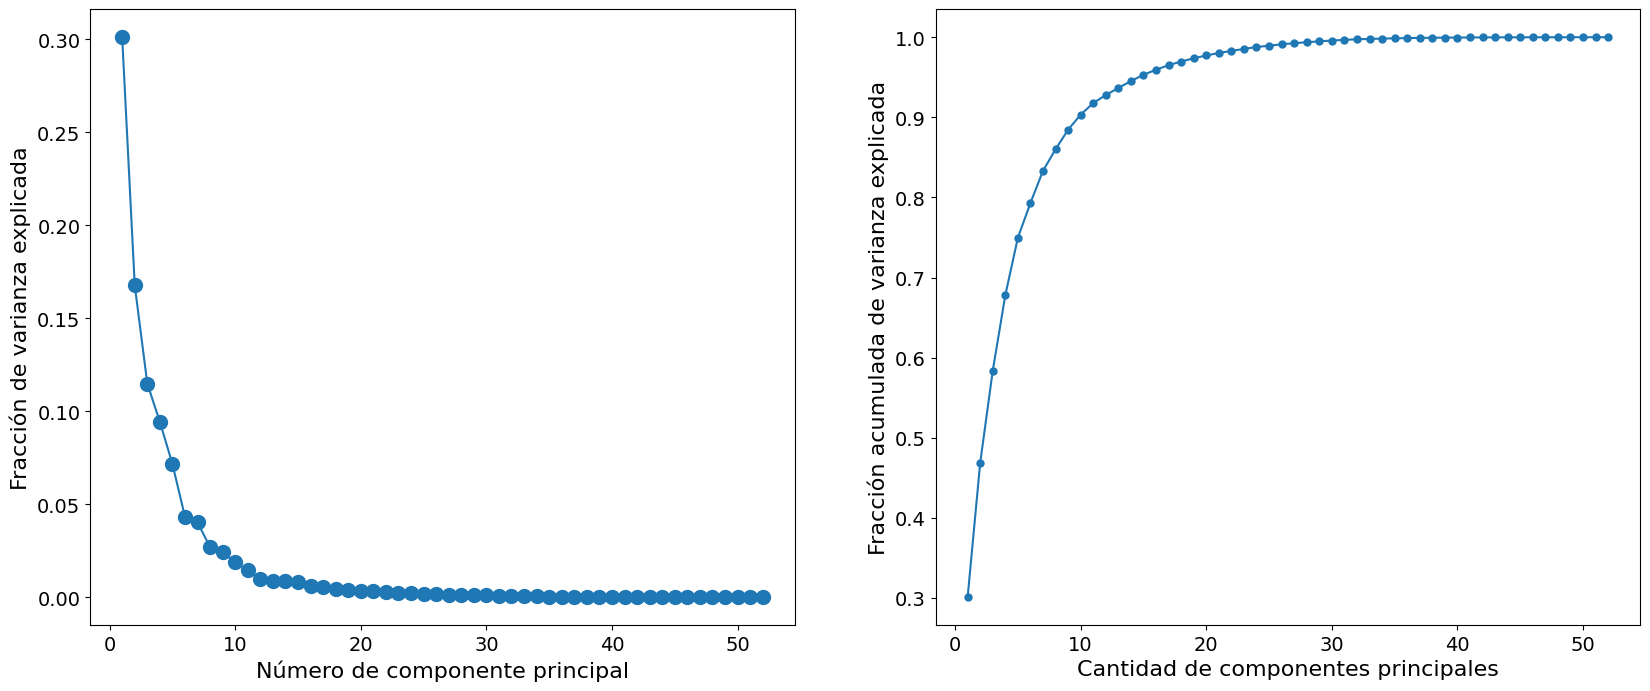

In [35]:
# con .explained_variance_ratio_ vemos la fracción de información que aporta cada componente
evr = pca.explained_variance_ratio_

# Graficamos la fracción de varianza que aporta cada componente
# y la información acumulada
fig, ax = plt.subplots(1, 2, figsize = (20, 8))

ax[0].plot(range(1, len(evr) + 1), evr, '.-', markersize = 20)
ax[0].set_ylabel('Fracción de varianza explicada')
ax[0].set_xlabel('Número de componente principal')

# Calculamos el acumulado con la función cumsum de numpy 
varianza_acumulada = np.cumsum(evr)

ax[1].plot(range(1, len(evr) + 1), varianza_acumulada, '.-', markersize = 10)
ax[1].set_ylabel('Fracción acumulada de varianza explicada')
ax[1].set_xlabel('Cantidad de componentes principales')

El gráfico de la izquierda nos dice qué fracción de información aporta cada componente. Lo que es importante notar es que cada componente aporta menos información que la anterior, por lo que las mismas están ordenadas de más a menos informativas. 

Quizás el gráfico de la derecha es más interesante: lo que nos dice es que tomando solamente las dos primeras componentes cubrimos el 70% de la información, con 3, un poco más del 80%, y así. Cuando tomamos tantas componentes como features en nuestro dataset original, no hay pérdida de información (esto simplemente se corresponde a un cambio de base del espacio de features al espacio de componentes principales).

In [ ]:
size=7

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

ax.scatter(*X.T)

ax.arrow(0, 0, pca.components_[0,0]*size, pca.components_[0,1]*size, color='red', width=0.1, head_width=0.5, alpha=0.8,
        label='Primera CP')
ax.arrow(0, 0, pca.components_[1,0]*size, pca.components_[1,1]*size, color='green', width=0.1, head_width=0.5, alpha=0.8,
        label='Segunda CP')
ax.legend()

ax.set_aspect('equal')

In [ ]:
selected_features = train_set.columns[list(pca.feature_names_in_)]
print(selected_features)

In [ ]:
# Plot
plt.scatter(*X.T)
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')